<a href="https://colab.research.google.com/github/parikshithsivakumar/NeuralNetworkandDeepLearning/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras numpy matplotlib opencv-python scipy scikit-learn


In [ ]:
import keras
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import optimizers, regularizers, backend as K
from keras.datasets import fashion_mnist, cifar100
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Lambda
from keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy import signal


In [ ]:
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

# Reshape and normalize
train_X = train_X.reshape(-1, 28, 28, 1).astype('float32') / 255
test_X = test_X.reshape(-1, 28, 28, 1).astype('float32') / 255

# Create a small subset for training and validation
train_X1, train_Y1 = train_X[:100], train_Y[:100]
val_X, val_Y = train_X[100:150], train_Y[100:150]

# Convert labels to one-hot encoding
train_Y_one_hot = to_categorical(train_Y1)
test_Y_one_hot = to_categorical(test_Y)
val_Y_one_hot = to_categorical(val_Y)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([
    Conv2D(64, (3,3), input_shape=(28, 28, 1)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(64),
    Dense(10),
    Activation('softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,682 (549.54 KB)

 Trainable params: 140,682 (549.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 434ms/step - accuracy: 0.1550 - loss: 2.2711 - val_accuracy: 0.1000 - val_loss: 2.2638
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.2196 - loss: 2.0679 - val_accuracy: 0.2000 - val_loss: 2.1046
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.3413 - loss: 1.8768 - val_accuracy: 0.4200 - val_loss: 1.8903
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.5504 - loss: 1.6466 - val_accuracy: 0.5800 - val_loss: 1.6623
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.7419 - loss: 1.3976 - val_accuracy: 0.5800 - val_loss: 1.4889
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.6854 - loss: 1.2003 - val_accuracy: 0.5000 - val_loss: 1.3361
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.6810 - loss: 1.0054 - val_accuracy: 0.5800 - val_loss: 1.1195
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.7329 - loss: 0.8736 - val_accuracy: 0.6000 - val_loss:

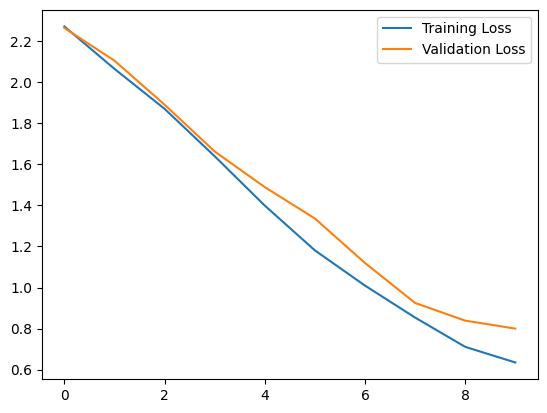

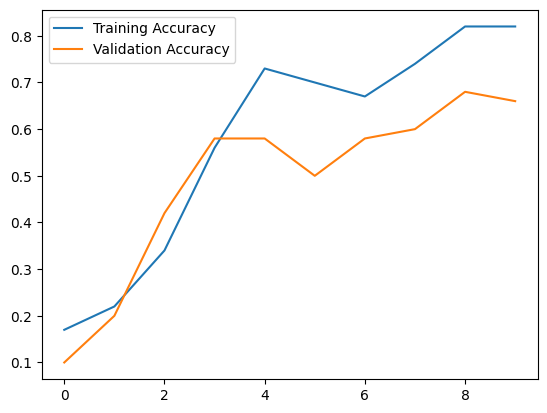

In [ ]:
history = model.fit(train_X1, train_Y_one_hot, batch_size=64, epochs=10, validation_data=(val_X, val_Y_one_hot))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.8346 - loss: 0.5461 - val_accuracy: 0.7000 - val_loss: 0.8145
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.8383 - loss: 0.4773 - val_accuracy: 0.7600 - val_loss: 0.8109
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.8108 - loss: 0.4785 - val_accuracy: 0.7200 - val_loss: 0.7131
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.8450 - loss: 0.4248 - val_accuracy: 0.7000 - val_loss: 0.7293
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8323 - loss: 0.4282 - val_accuracy: 0.7400 - val_loss: 0.7864
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.8731 - loss: 0.3384 - val_accuracy: 0.7200 - val_loss: 0.7920
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.8769 - loss: 0.2927 - val_accuracy: 0.7400 - val_loss: 0.7279
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.8835 - loss: 0.2927 - val_accuracy: 0.7600 - val_loss:

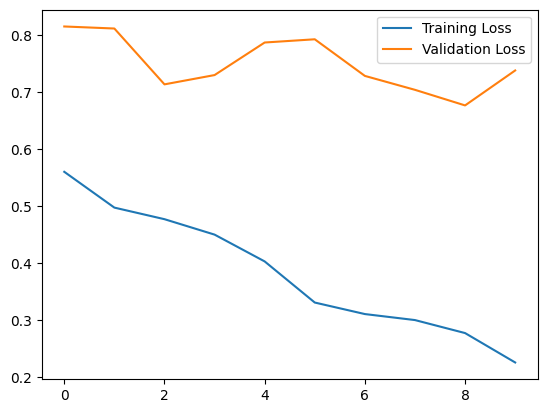

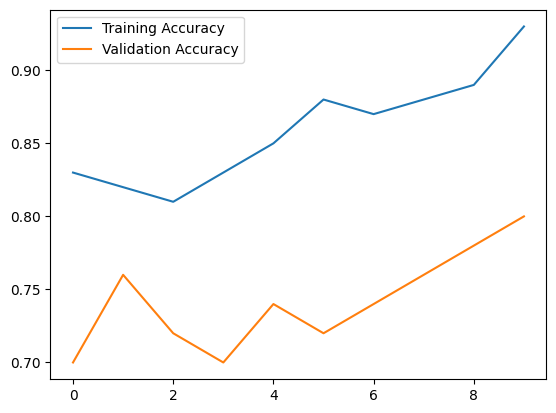

In [ ]:
history = model.fit(train_X1, train_Y_one_hot, batch_size=64, epochs=10, validation_data=(val_X, val_Y_one_hot))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
score = model.evaluate(test_X[:100], test_Y_one_hot[:100], verbose=1)
print('\nKeras CNN Accuracy:', score[1])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7151 - loss: 1.0618

Keras CNN Accuracy: 0.7200000286102295


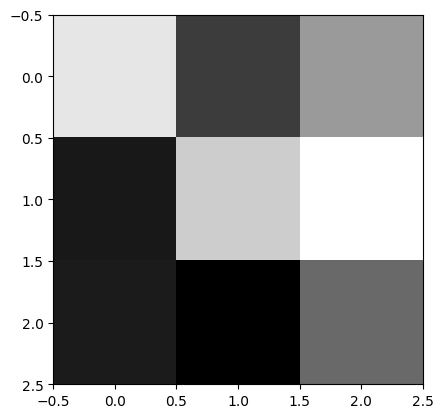

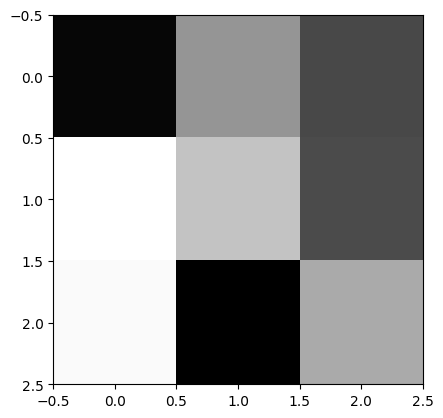

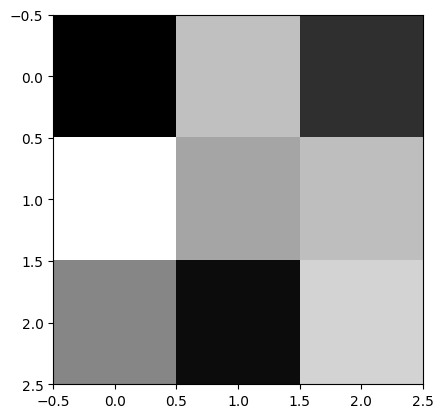

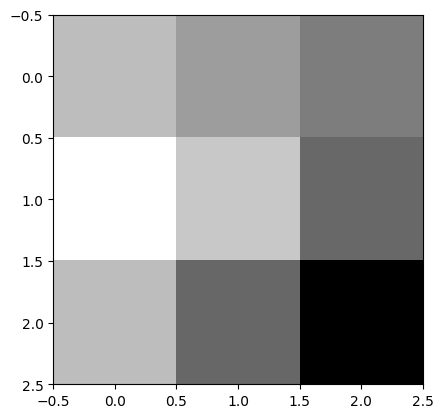

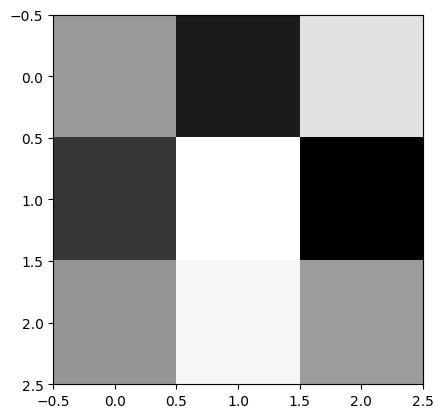

In [ ]:
filters, biases = model.layers[0].get_weights()

# Plot first 5 filters
for i in range(5):
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.show()


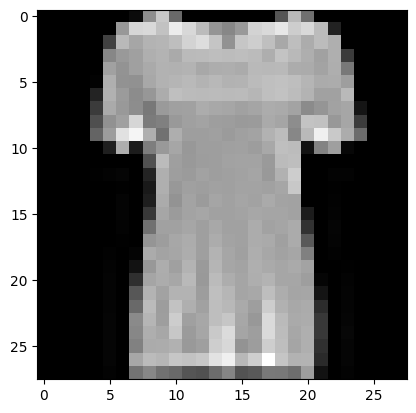

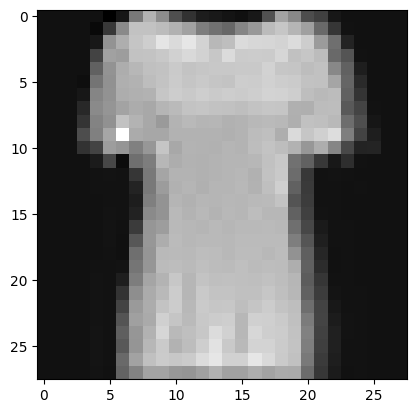

In [ ]:
from scipy import signal

im = train_X[10]
plt.imshow(im, cmap='gray')
plt.show()

filtered_img = signal.convolve2d(im.reshape(28,28), filters[:,:,0,1].reshape(3,3), boundary='symm', mode='same')
plt.imshow(filtered_img, cmap='gray')
plt.show()


In [ ]:
fc_model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

fc_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

fc_history = fc_model.fit(train_X1, train_Y_one_hot, batch_size=64, epochs=10, validation_data=(val_X, val_Y_one_hot))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - accuracy: 0.1075 - loss: 2.3401 - val_accuracy: 0.1200 - val_loss: 2.1726
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.2410 - loss: 1.9023 - val_accuracy: 0.3200 - val_loss: 1.9371
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5304 - loss: 1.6037 - val_accuracy: 0.5000 - val_loss: 1.6823
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6246 - loss: 1.4019 - val_accuracy: 0.5600 - val_loss: 1.4623
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.6394 - loss: 1.2162 - val_accuracy: 0.5600 - val_loss: 1.3342
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7048 - loss: 1.0419 - val_accuracy: 0.5600 - val_loss: 1.2433
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.6906 - loss: 0.9252 - val_accuracy: 0.6000 - val_loss: 1.1226
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7804 - loss: 0.8046 - val_accuracy: 0.6000 - val_loss: 1.0237
Epoch 9/

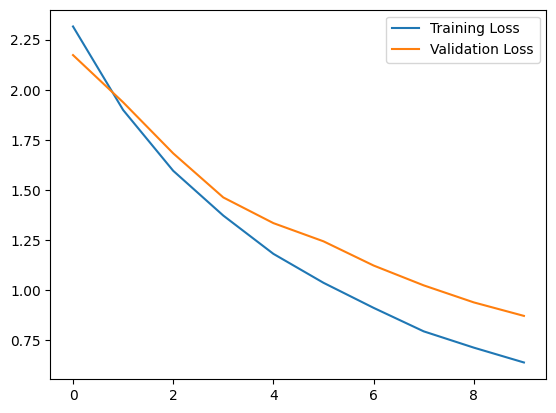

In [ ]:
plt.plot(fc_history.history['loss'], label='Training Loss')
plt.plot(fc_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
fc_score = fc_model.evaluate(test_X[:100], test_Y_one_hot[:100], verbose=1)
print('\nFully Connected Network Accuracy:', fc_score[1])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6239 - loss: 1.0755

Fully Connected Network Accuracy: 0.6299999952316284
